In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


PROTEIN_RESIDUES = 19

def NOEclassify(distance):
    if distance <= 2.7:
        return 3
    elif distance <= 3.5:
        return 2
    elif distance <= 5.0:
        return 1
    else:
        return 0

def NOE(originFile,PROTEIN_RESIDUES):
    NOEdataRaw = np.loadtxt(originFile,skiprows=1)
    i=0
    NOEdata = [min(NOEdataRaw[7500:,i]) for i in range(1,len(NOEdataRaw[i]))]

    Matrix = np.zeros((PROTEIN_RESIDUES,PROTEIN_RESIDUES))

    count=0
    for i in range(PROTEIN_RESIDUES):
        for j in range(i,PROTEIN_RESIDUES):
            Matrix[i][j] = NOEdata[count]
            count += 1

    for i in range(PROTEIN_RESIDUES):
        for j in range(i+1):
            Matrix[i][j] = Matrix[j][i]

    MatrixNOE = np.zeros((PROTEIN_RESIDUES,PROTEIN_RESIDUES))

    for i in range(PROTEIN_RESIDUES):
        for j in range(PROTEIN_RESIDUES):
            MatrixNOE[i][j] = NOEclassify(Matrix[i][j])

    return MatrixNOE

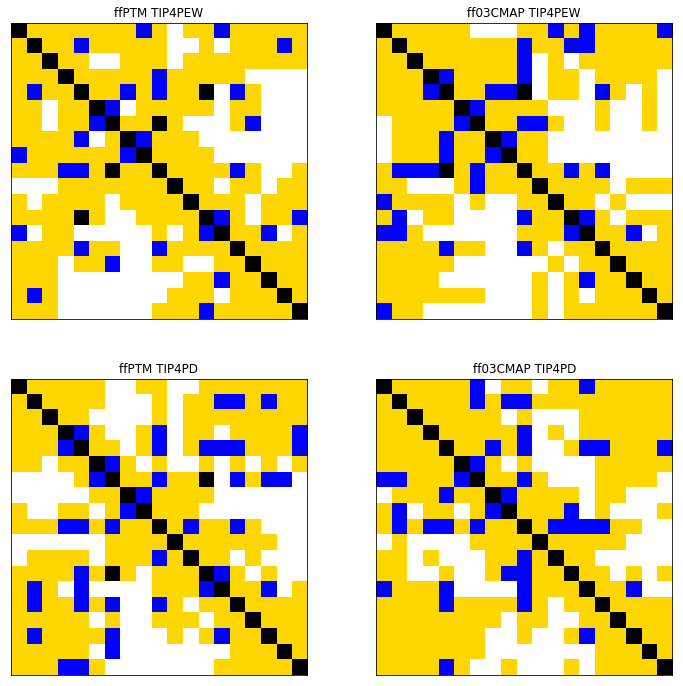

In [6]:
MatrixNOEEW = NOE("noe_2cef.dat",PROTEIN_RESIDUES)
MatrixNOEEWCMAP = NOE("noe_2cef_CMAP.dat",PROTEIN_RESIDUES)
MatrixNOED = NOE("noe_2cef_D.dat",PROTEIN_RESIDUES)
MatrixNOEDCMAP = NOE("noe_2cef_D_CMAP.dat",PROTEIN_RESIDUES)

cmap = ListedColormap(["white", "gold", "blue", "black"])

plt.subplots(figsize=(12,12))

plt.subplot(221)
plt.title('ffPTM TIP4PEW')
plt.imshow(MatrixNOEEW,cmap=cmap)
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.title('ff03CMAP TIP4PEW')
plt.imshow(MatrixNOEEWCMAP,cmap=cmap)
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.title('ffPTM TIP4PD')
plt.imshow(MatrixNOED,cmap=cmap)
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.title('ff03CMAP TIP4PD')
plt.imshow(MatrixNOEDCMAP,cmap=cmap)
plt.xticks([])
plt.yticks([])

plt.savefig("NOE_2cef.png",dpi=200)
plt.show()